In [1]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

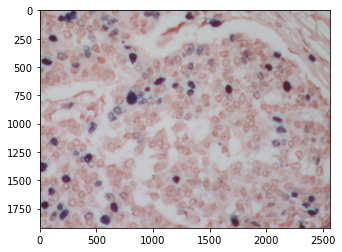

In [2]:
img1=cv2.imread("1718 KI67.jpg")
plt.imshow(img1)

In [3]:
hist_c,bins_c = np.histogram(img1.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_c = hist_c.cumsum()
cdf_c_normalized = cdf_c * hist_c.max()/ cdf_c.max()

In [4]:
image_yuv = cv2.cvtColor(img1, cv2.COLOR_BGR2YUV)

# Applying Histogram Equalization on the original imageof the Y channel
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# Convert the YUV image back to RGB format
image_c_equalized = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

# Generating the histogram of the equalized image
hist_c_equalized, bins_c_equalized = np.histogram(image_c_equalized.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_c_equalized = hist_c_equalized.cumsum()
cdf_c_equalized_normalized = cdf_c_equalized * hist_c_equalized.max()/ cdf_c_equalized.max()

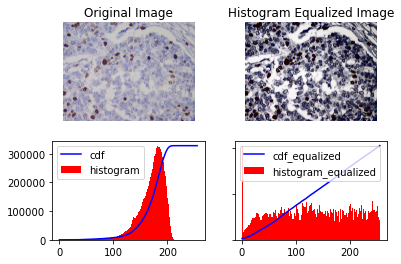

In [5]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_c_equalized, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Histogram Equalized Image')


axs[1, 0].plot(cdf_c_normalized, color = 'b')
axs[1, 0].hist(img1.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_c_equalized_normalized, color = 'b')
axs[1, 1].hist(image_c_equalized.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_equalized','histogram_equalized'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

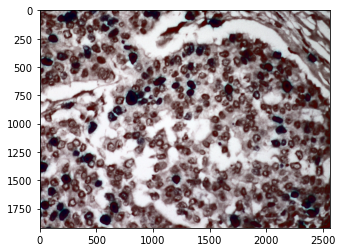

In [6]:
plt.imshow(image_c_equalized)

In [7]:
save_img=cv2.cvtColor(image_c_equalized, cv2.COLOR_BGR2RGB)
cv2.imwrite("1718_contrast.jpg",save_img)

True

In [8]:
blur = cv2.GaussianBlur(image_c_equalized,(13,13),0)

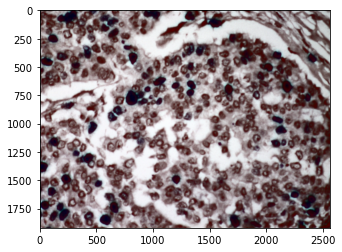

In [9]:
plt.imshow(blur)

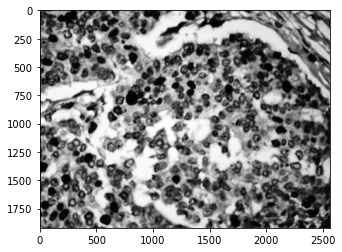

In [10]:
gray1=cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1,'gray')

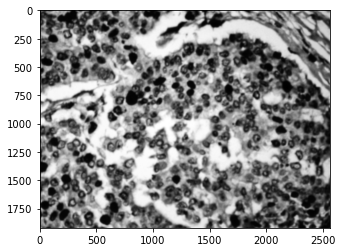

In [11]:
blur = cv2.GaussianBlur(gray1,(21,21),0)
plt.imshow(blur,'gray')

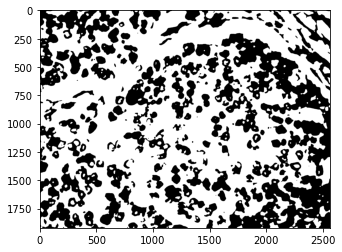

In [12]:
threshold,binary2=cv2.threshold(blur,100,255,cv2.THRESH_BINARY)
plt.imshow(binary2,'gray')

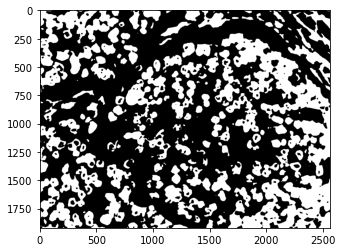

In [13]:
binary=binary2-255
plt.imshow(binary,'gray')

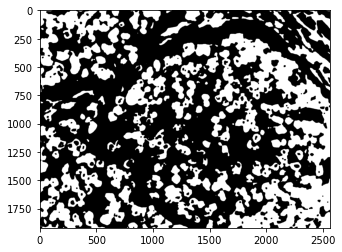

In [14]:
kernel = np.ones((3,3),np.uint8)
closed = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel=kernel, iterations=4)
plt.imshow(closed,'gray')

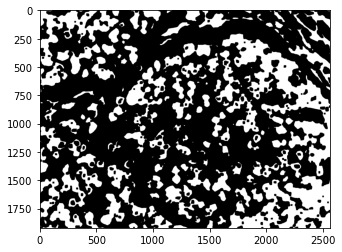

In [15]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(closed, kernel, iterations=5)
plt.imshow(erosion,'gray')

In [16]:
contour2, hierarchy = cv2.findContours(image=erosion.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [17]:
contour_all=len(contour2)
len(contour2)

211

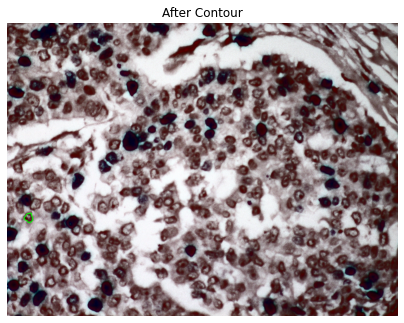

In [18]:
cv2.drawContours(image=image_c_equalized,contours=contour2,contourIdx=60, color=(0,255,0), thickness=5)
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(image_c_equalized, cmap="gray"), plt.axis("off");

In [19]:
cells=0
for i in range(len(contour2)):
    cv2.drawContours(image=image_c_equalized,contours=contour2,contourIdx=i, color=(255,0,0), thickness=5)
    area=cv2.contourArea(contour2[i])
    print(area,i)
    if(area>500):
        if(area>4300):
            cells=cells+(area//4300)
        else:
            cells=cells+1 

0.0 0
33.5 1
73.0 2
2027.0 3
743.0 4
1242.5 5
2453.5 6
6.0 7
2355.0 8
378.0 9
112.0 10
1047.0 11
2455.5 12
9757.0 13
90.5 14
8796.0 15
3808.5 16
5524.0 17
27223.0 18
5165.5 19
26337.0 20
2317.0 21
3421.0 22
6089.0 23
7985.5 24
17071.0 25
30377.0 26
4983.5 27
152.5 28
432.5 29
943.5 30
26561.5 31
1258.0 32
230029.5 33
5132.5 34
8.0 35
2130.5 36
1358.5 37
14628.5 38
13524.5 39
17422.0 40
404.0 41
7338.0 42
51.5 43
18875.0 44
3067.5 45
29746.0 46
2446.5 47
10.0 48
3767.5 49
1842.5 50
87.5 51
1079.5 52
1007.5 53
0.0 54
1131.5 55
30.5 56
0.0 57
9885.5 58
111.5 59
2345.0 60
47.5 61
3449.0 62
355.5 63
146.0 64
27175.5 65
8302.0 66
2549.0 67
2169.0 68
2.0 69
413.5 70
694.0 71
0.0 72
21.0 73
2385.0 74
6081.5 75
1385.5 76
2811.0 77
88.0 78
89.5 79
5855.5 80
7651.0 81
12.5 82
1131.5 83
3564.5 84
920.5 85
14665.5 86
25.5 87
0.0 88
30.5 89
5045.5 90
17928.5 91
40.0 92
0.0 93
14205.5 94
1355.0 95
48.0 96
4950.0 97
30.0 98
0.0 99
8909.5 100
2489.0 101
1258.5 102
20.0 103
1172.0 104
1976.0 105
42.0 10

In [20]:
cells


394.0

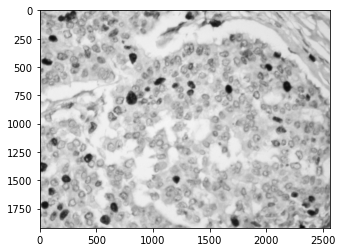

In [21]:
gray_org=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_org,'gray')

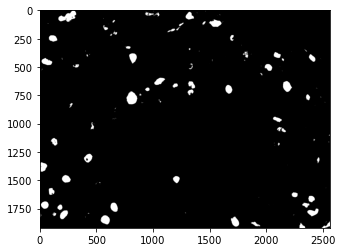

In [22]:
thresh, binary = cv2.threshold(gray_org, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(binary,'binary')

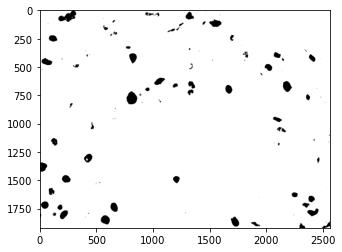

In [23]:
binary=binary-255
plt.imshow(binary,'binary')

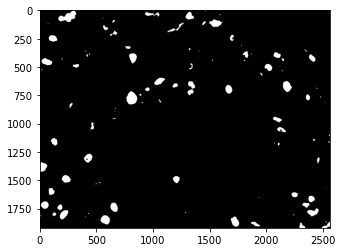

In [24]:
kernel = np.ones((3,3),np.uint8)
closed = cv2.morphologyEx(binary,cv2.MORPH_CLOSE, kernel=kernel, iterations=5)
plt.imshow(closed,'gray')

In [25]:
contour2, hierarchy = cv2.findContours(image=closed.copy(), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [26]:
contour_brown=len(contour2)
len(contour2)

146

0.0 0
1401.5 1
0.0 2
1646.0 3
1607.0 4
52.5 5
0.0 6
0.0 7
4373.5 8
17.5 9
4819.5 10
50.0 11
56.5 12
226.0 13
0.0 14
704.0 15
40.5 16
3883.5 17
3948.5 18
0.0 19
0.5 20
1533.5 21
0.0 22
0.0 23
1766.0 24
3948.5 25
3349.5 26
21.0 27
2375.0 28
1796.0 29
0.0 30
2330.0 31
10.0 32
0.0 33
0.0 34
41.0 35
0.0 36
66.0 37
3.5 38
2595.5 39
3752.5 40
1.0 41
0.0 42
3956.5 43
740.5 44
3934.0 45
4.5 46
275.0 47
36.0 48
103.0 49
198.5 50
2596.0 51
71.5 52
0.0 53
0.0 54
1907.0 55
1123.5 56
138.0 57
2132.0 58
16.5 59
39.5 60
1.5 61
0.0 62
0.0 63
603.0 64
9.0 65
71.5 66
235.5 67
1.0 68
45.5 69
1358.5 70
209.5 71
7996.0 72
0.0 73
44.5 74
900.5 75
3457.0 76
1211.0 77
4252.0 78
5187.5 79
0.0 80
3635.0 81
232.0 82
0.0 83
0.0 84
40.5 85
48.5 86
4.5 87
0.0 88
6.5 89
0.0 90
1155.5 91
2789.5 92
600.5 93
0.0 94
82.5 95
54.0 96
0.0 97
2.5 98
320.5 99
3889.0 100
0.0 101
0.0 102
56.5 103
0.0 104
202.5 105
2297.0 106
29.0 107
66.0 108
4126.0 109
2219.5 110
0.0 111
0.0 112
1633.5 113
22.0 114
39.0 115
126.5 116
171.5 117

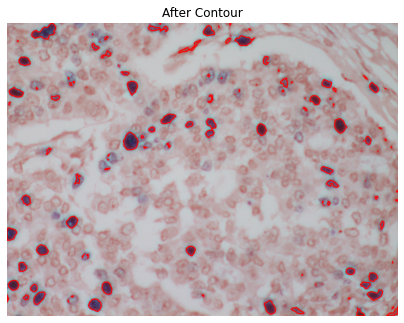

In [29]:
cells_brown=0
for i in range(len(contour2)):
    cv2.drawContours(image=img1,contours=contour2,contourIdx=i, color=(255,0,0), thickness=5)
    area=cv2.contourArea(contour2[i])
    print(area,i)
    if(area>2):
        cells_brown=cells_brown+1
    
plt.figure(figsize=(7,7)), plt.title("After Contour"), plt.imshow(img1, cmap="gray"), plt.axis("off");

In [30]:
cells_brown

103

In [31]:
percent_positivity_1=(cells_brown/cells)*100
percent_positivity_1


26.14213197969543

In [32]:
#manualcount_blue=295
#manualcount_brown=47

actual_percent_positivity=(72/333)*100
actual_percent_positivity


21.62162162162162

In [33]:
error_rate = abs((actual_percent_positivity-percent_positivity_1))/actual_percent_positivity
error_rate=error_rate*100
error_rate

20.907360406091374

In [34]:
accuracy=100-(error_rate)
accuracy

79.09263959390863

In [35]:
#without area manipulations

percent_positivity=(contour_brown/contour_all)*100
percent_positivity


69.19431279620854

In [36]:
error_rate = abs(actual_percent_positivity-percent_positivity)/actual_percent_positivity
error_rate=error_rate*100
error_rate

220.02369668246448

In [37]:
accuracy=100-(error_rate)
accuracy

-120.02369668246448